In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df 

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values 
dataset 

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [5]:
X = dataset[:,0:10]
Y = dataset[:,10] 

In [6]:
from sklearn import preprocessing 

min_max_scaler = preprocessing.MinMaxScaler() 
X_scale = min_max_scaler.fit_transform(X) 
X_scale 
from sklearn.model_selection import train_test_split 
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3) 
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5) 
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, 
Y_val.shape, Y_test.shape) 

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [7]:
from keras.models import Sequential 
from keras.layers import Dense 

model = Sequential([ 
    Dense(32, activation='relu', input_shape=(10,)), 
    Dense(32, activation='relu'), 
    Dense(1, activation='sigmoid'), 
])

C:\Users\pishroit\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
Dense(32, activation='relu', input_shape=(10,))

<Dense name=dense_3, built=False>

In [9]:
Dense(32, activation='relu'),
Dense(1, activation='sigmoid'),
model.compile(optimizer='sgd', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
optimizer='sgd',
loss='binary_crossentropy',
metrics=['accuracy']
hist = model.fit(X_train, Y_train, 
          batch_size=32, epochs=100, 
          validation_data=(X_val, Y_val)) 

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4959 - loss: 0.7052 - val_accuracy: 0.5114 - val_loss: 0.6943
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4971 - loss: 0.6973 - val_accuracy: 0.4749 - val_loss: 0.6883
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4973 - loss: 0.6909 - val_accuracy: 0.5799 - val_loss: 0.6828
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5145 - loss: 0.6886 - val_accuracy: 0.6986 - val_loss: 0.6774
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6600 - loss: 0.6779 - val_accuracy: 0.7306 - val_loss: 0.6719
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6903 - loss: 0.6757 - val_accuracy: 0.7169 - val_loss: 0.6668
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6893 - loss: 0.6673 - val_accuracy: 0.7215 - val_loss: 0.6618
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7008 - loss: 0.6593 - val_accuracy: 0.7352 - v

In [10]:
model.evaluate(X_test, Y_test)[1]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8972 - loss: 0.2895 


0.8721461296081543

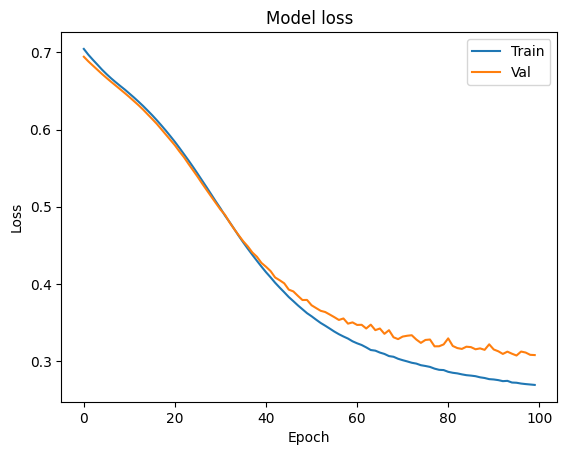

In [11]:
import matplotlib.pyplot as plt 
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper right') 
plt.show()

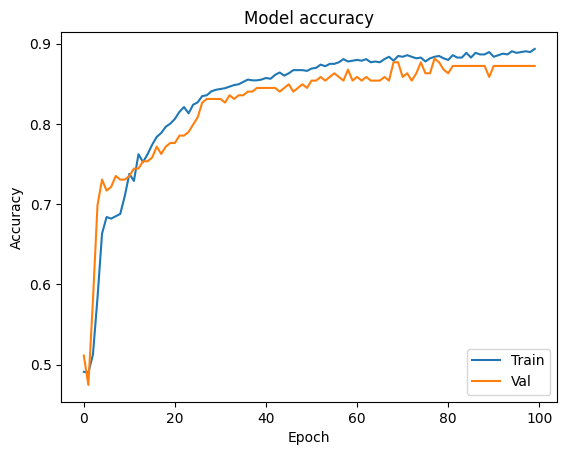

In [12]:
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('Model accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='lower right') 
plt.show() 

In [13]:
model_2 = Sequential([ 
    Dense(1000, activation='relu', input_shape=(10,)), 
    Dense(1000, activation='relu'), 
    Dense(1000, activation='relu'), 
    Dense(1000, activation='relu'), 
    Dense(1, activation='sigmoid'), 
]) 
 
model_2.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 
               
hist_2 = model_2.fit(X_train, Y_train, 
          batch_size=32, epochs=100, 
          validation_data=(X_val, Y_val)) 

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6791 - loss: 0.5554 - val_accuracy: 0.8265 - val_loss: 0.3856
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8786 - loss: 0.3220 - val_accuracy: 0.8767 - val_loss: 0.3374
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8961 - loss: 0.2745 - val_accuracy: 0.8584 - val_loss: 0.3428
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8982 - loss: 0.2785 - val_accuracy: 0.8950 - val_loss: 0.3233
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8743 - loss: 0.2746 - val_accuracy: 0.8676 - val_loss: 0.3198
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8988 - loss: 0.2555 - val_accuracy: 0.8676 - val_loss: 0.3341
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8904 - loss: 0.2387 - val_accuracy: 0.8219 - val_loss: 0.4240
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9033 - loss: 0.2306 - val_accuracy: 0.

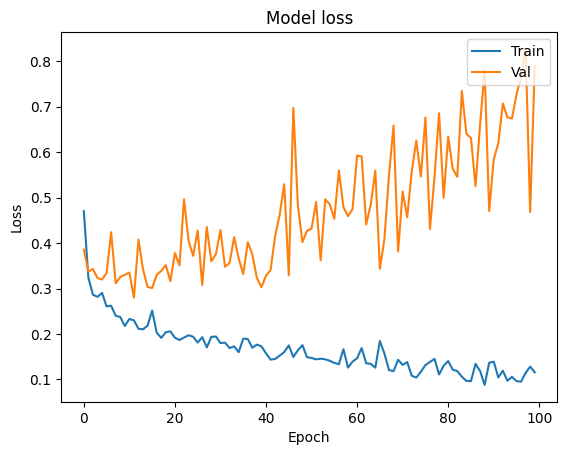

In [14]:
plt.plot(hist_2.history['loss']) 
plt.plot(hist_2.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper right') 
plt.show()

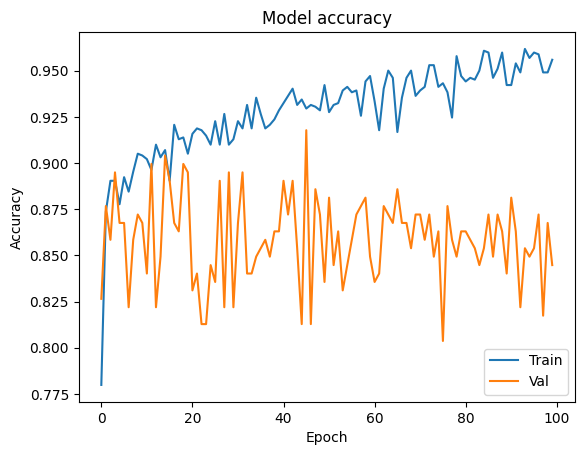

In [15]:
plt.plot(hist_2.history['accuracy']) 
plt.plot(hist_2.history['val_accuracy']) 
plt.title('Model accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='lower right') 
plt.show() 

In [16]:
from keras.layers import Dropout 

model_3 = Sequential([ 
    Dense(1000, activation='relu',  input_shape=(10,)), 
    Dropout(0.5), 
    Dense(1000, activation='relu'),  
    Dropout(0.5), 
    Dense(1000, activation='relu'),  
    Dropout(0.5), 
    Dense(1000, activation='relu'),  
    Dropout(0.5), 
    Dense(1, activation='sigmoid'),  
]) 

Dropout(0.5),
model_3.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 
               
hist_3 = model_3.fit(X_train, Y_train, 
          batch_size=32, epochs=100, 
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5984 - loss: 0.6398 - val_accuracy: 0.8219 - val_loss: 0.4343
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8380 - loss: 0.4099 - val_accuracy: 0.8584 - val_loss: 0.3606
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8511 - loss: 0.3529 - val_accuracy: 0.8539 - val_loss: 0.3571
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8569 - loss: 0.3358 - val_accuracy: 0.8493 - val_loss: 0.3346
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8855 - loss: 0.3009 - val_accuracy: 0.8904 - val_loss: 0.3211
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8760 - loss: 0.3075 - val_accuracy: 0.8402 - val_loss: 0.3473
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8971 - loss: 0.2711 - val_accuracy: 0.8493 - val_loss: 0.3427
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8838 - loss: 0.2742 - val_accuracy: 0.

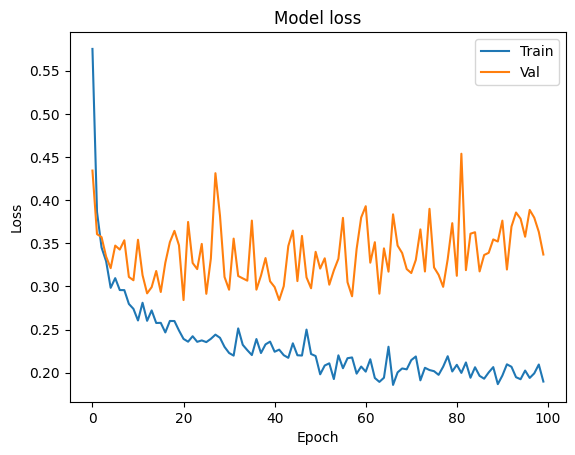

In [17]:
plt.plot(hist_3.history['loss']) 
plt.plot(hist_3.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='upper right') 
plt.show() 

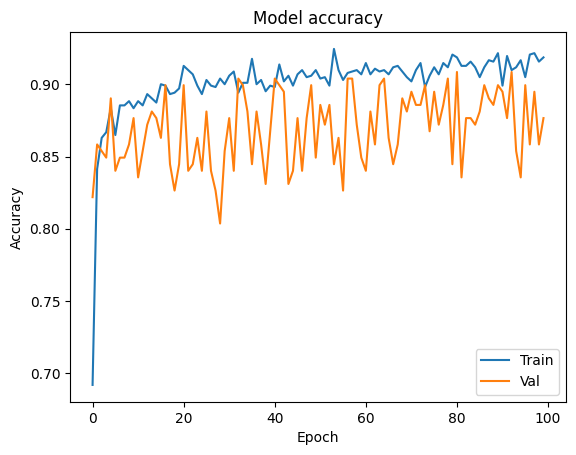

In [18]:
plt.plot(hist_3.history['accuracy']) 
plt.plot(hist_3.history['val_accuracy']) 
plt.title('Model accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Val'], loc='lower right') 
plt.show()